### 실습 및 과제
- 결측치, 이상치 검토
- 유의미한 시각화 5개 이상
- 수치형 변수 간 상관관계 파악
- 파생변수 생성

- 종속변수(target): attrition(퇴직 여부)

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_csv("C:/Users/MJHwang/Downloads/archive (2)/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [122]:
df.shape

(1470, 35)

In [123]:
df.isna().sum() # 결측치 검토

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

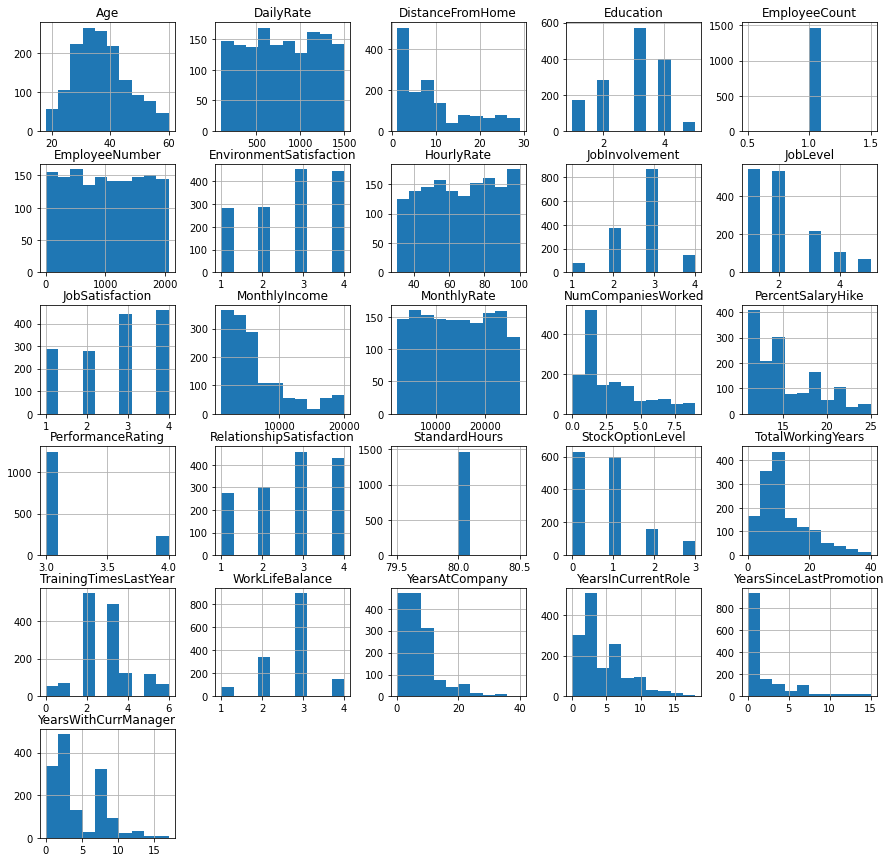

In [124]:
df.hist(figsize = (15, 15))
plt.show()

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [127]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [128]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [129]:
df.drop(['EmployeeCount','StandardHours'], axis=1, inplace = True)

- EmployeeCount와 StandardHours는 의미 없는 열이라고 판단해 drop함

In [130]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [131]:
df['EmployeeNumber'].nunique()

1470

In [132]:
df.drop(['Over18','EmployeeNumber'], axis=1, inplace = True)

- Over18과 EmployeeNumber도 의미 없는 열이라 판단해 drop

In [133]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [134]:
df_int = df.select_dtypes(include="int64").columns.to_list(); df_int

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

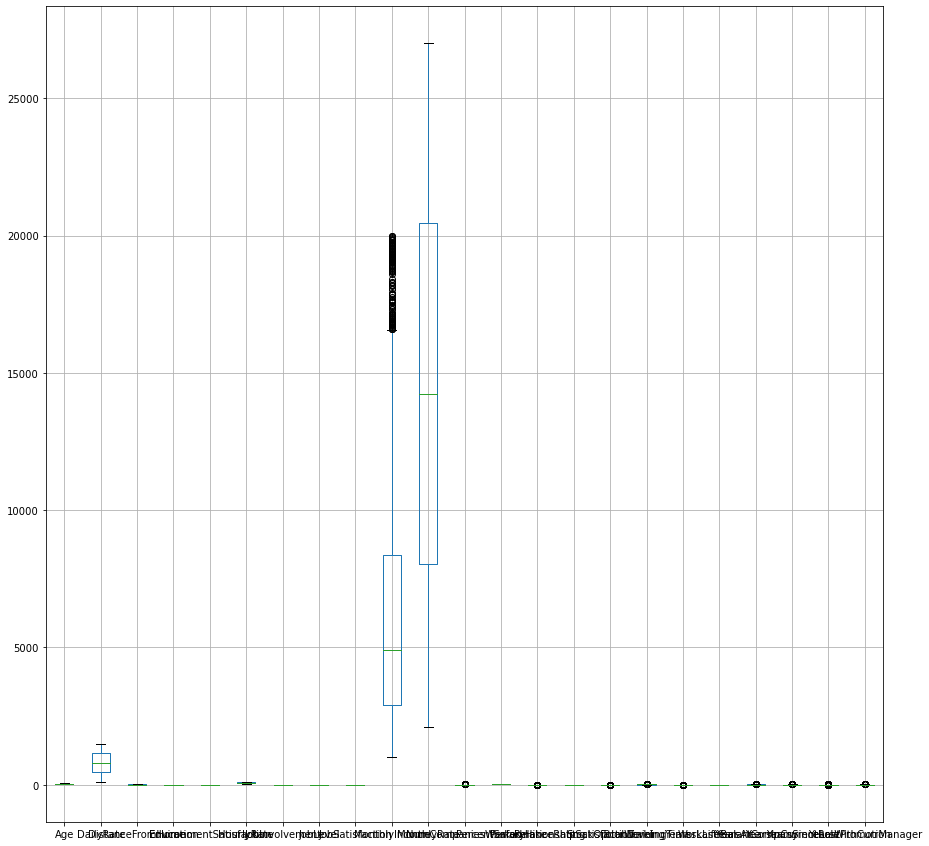

In [135]:
df.boxplot(figsize=(15,15))
plt.show()

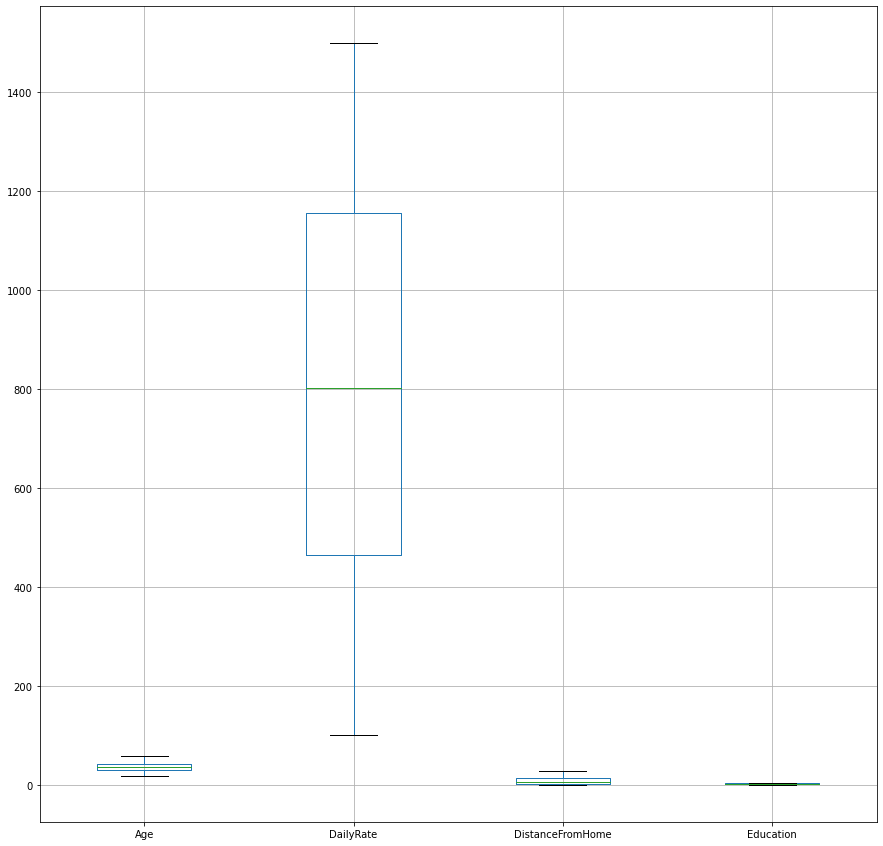

In [136]:
df[['Age','DailyRate','DistanceFromHome','Education']].boxplot(figsize = (15, 15))
plt.show()

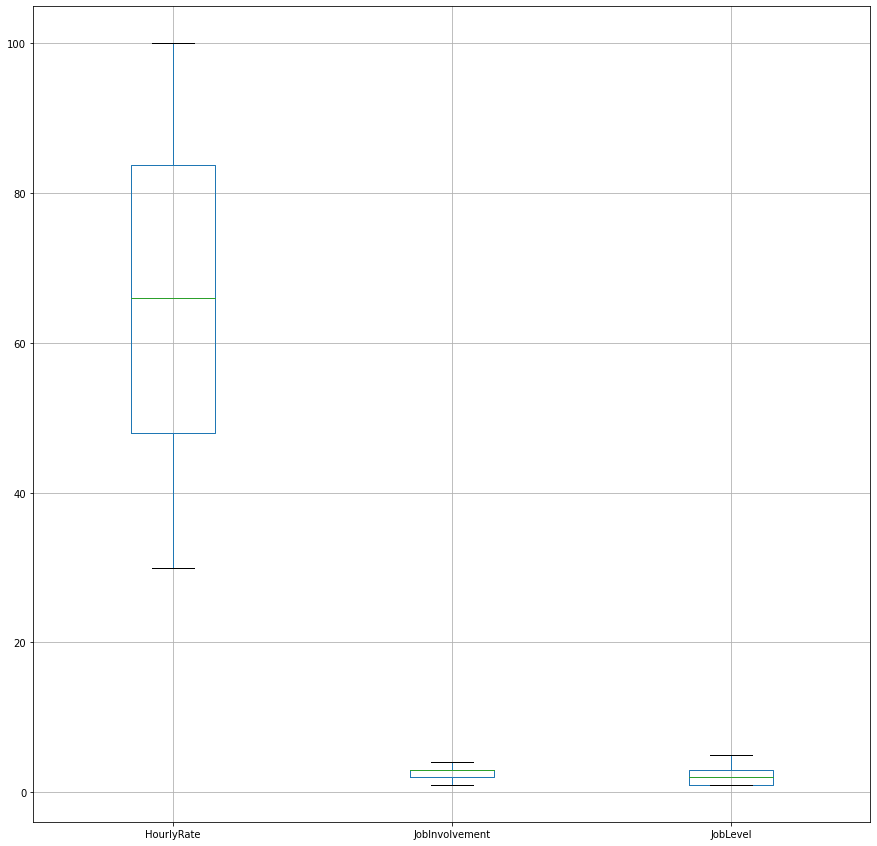

In [137]:
df[['HourlyRate',
 'JobInvolvement',
 'JobLevel']].boxplot(figsize=(15,15))
plt.show()

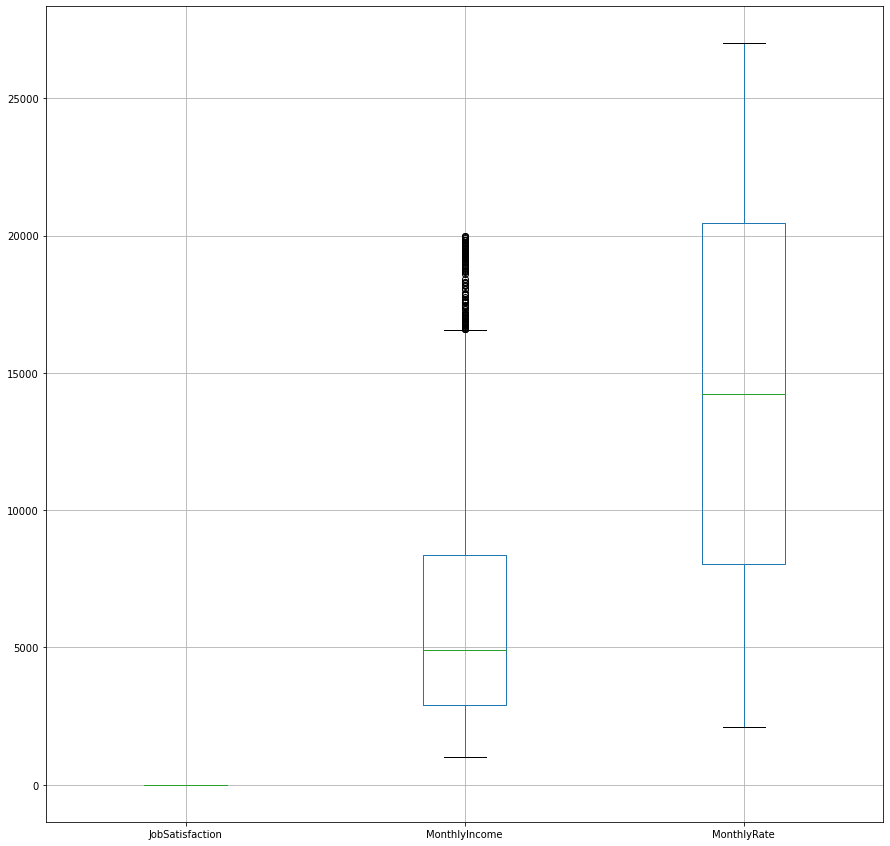

In [138]:
df[['JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate']].boxplot(figsize=(15,15))
plt.show()

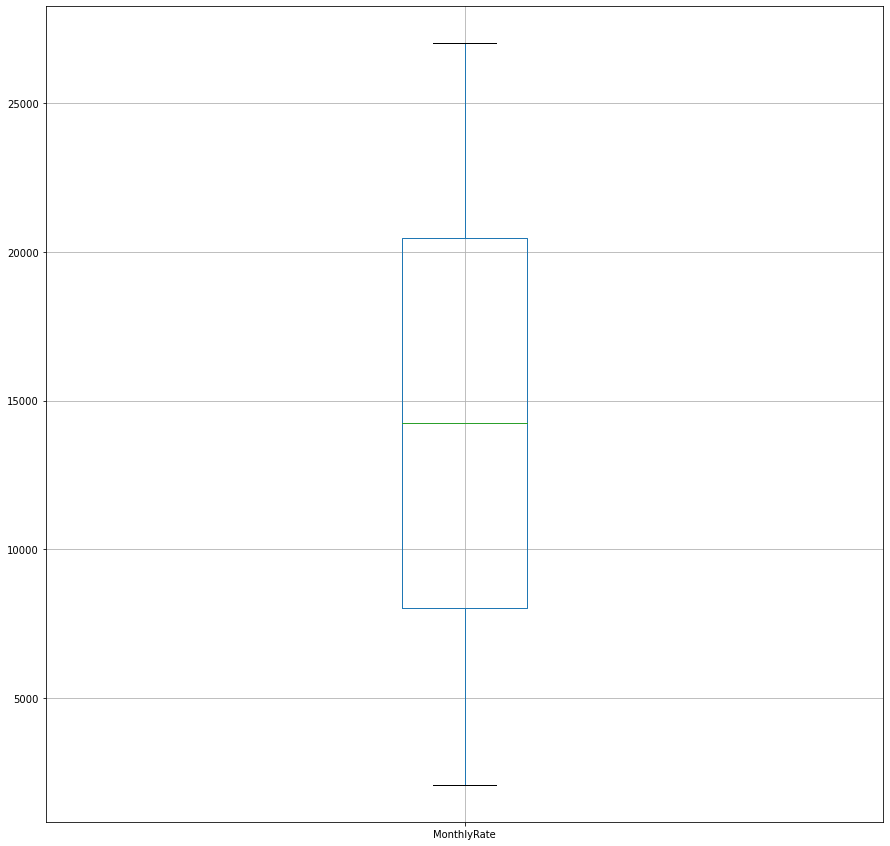

In [139]:
df[['MonthlyRate']].boxplot(figsize=(15,15))
plt.show()

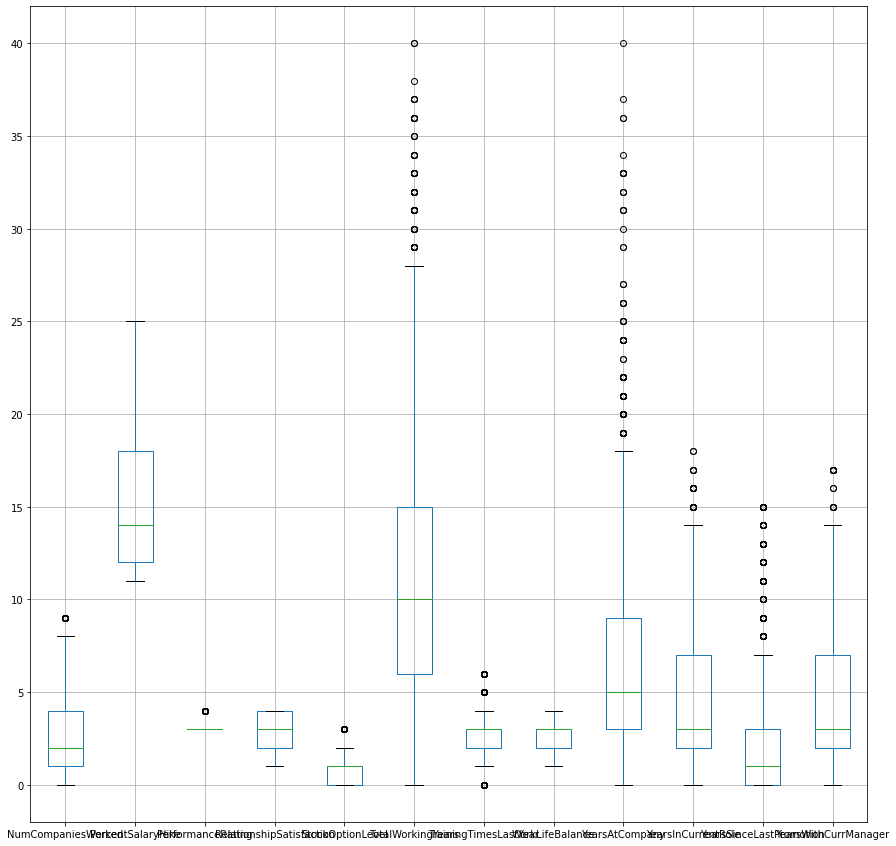

In [140]:
df[['NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']].boxplot(figsize=(15,15))
plt.show()

- boxplot상 이상치 존재
: 'MonthlyIncome', 'NumCompaniesWorked','PerformanceRating', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager'

<AxesSubplot:>

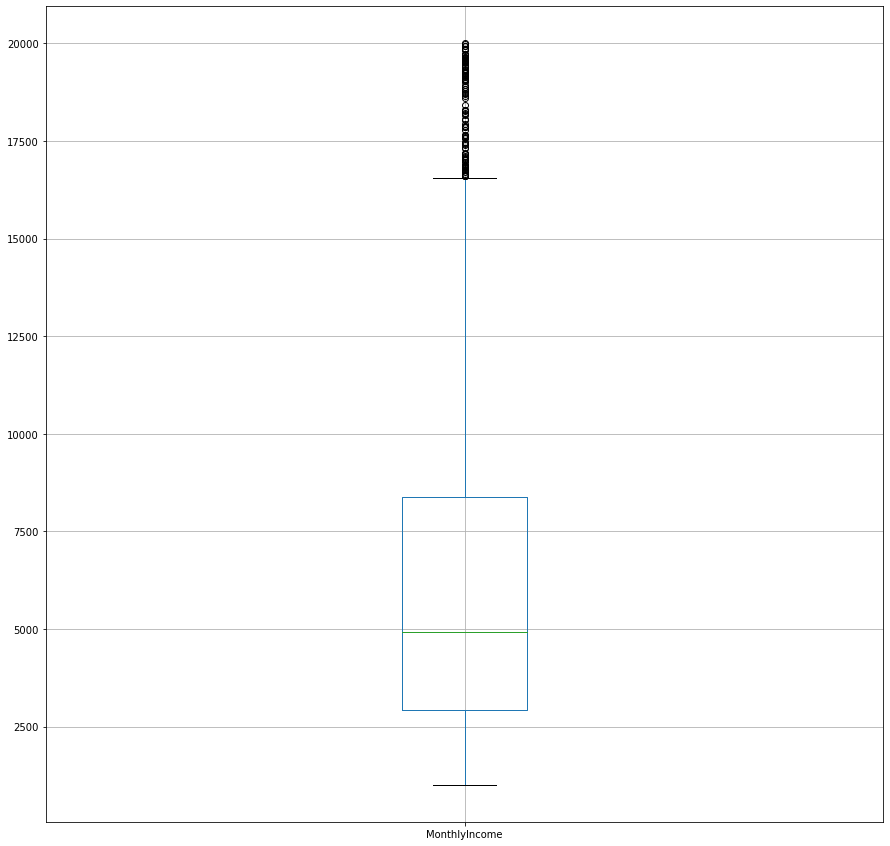

In [168]:
df[['MonthlyIncome']].boxplot(figsize= (15, 15))

In [176]:
sort = df.sort_values(by = 'MonthlyIncome', ascending = False)
sort['MonthlyIncome']

190     19999
746     19973
851     19943
165     19926
568     19859
        ...  
1365     1091
1338     1081
764      1052
727      1051
513      1009
Name: MonthlyIncome, Length: 1470, dtype: int64

In [207]:
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['MonthlyIncome'] < lower_bound) | (df['MonthlyIncome'] > upper_bound)]

print("이상치 개수:", len(outliers))

이상치 개수: 114


In [208]:
df_c = df[(df['MonthlyIncome'] >= lower_bound) & (df['MonthlyIncome'] <= upper_bound)]
df_c

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Satisfaction
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,7
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,9
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,9
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8,7,3,0,10
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,6,3,3,2,2,2,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,1,17,3,3,5,2,0,3,10
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,1,9,5,3,7,7,1,7,6
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,1,6,0,3,6,2,0,3,6
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,4,0,17,3,2,9,6,0,8,10


In [243]:
df_c['YearsWithCurrManager'].value_counts()

2     332
0     250
7     199
3     135
4      93
8      92
1      68
9      46
5      29
6      21
11     15
10     15
12     13
13     10
17      3
15      2
Name: YearsWithCurrManager, dtype: int64

<AxesSubplot:>

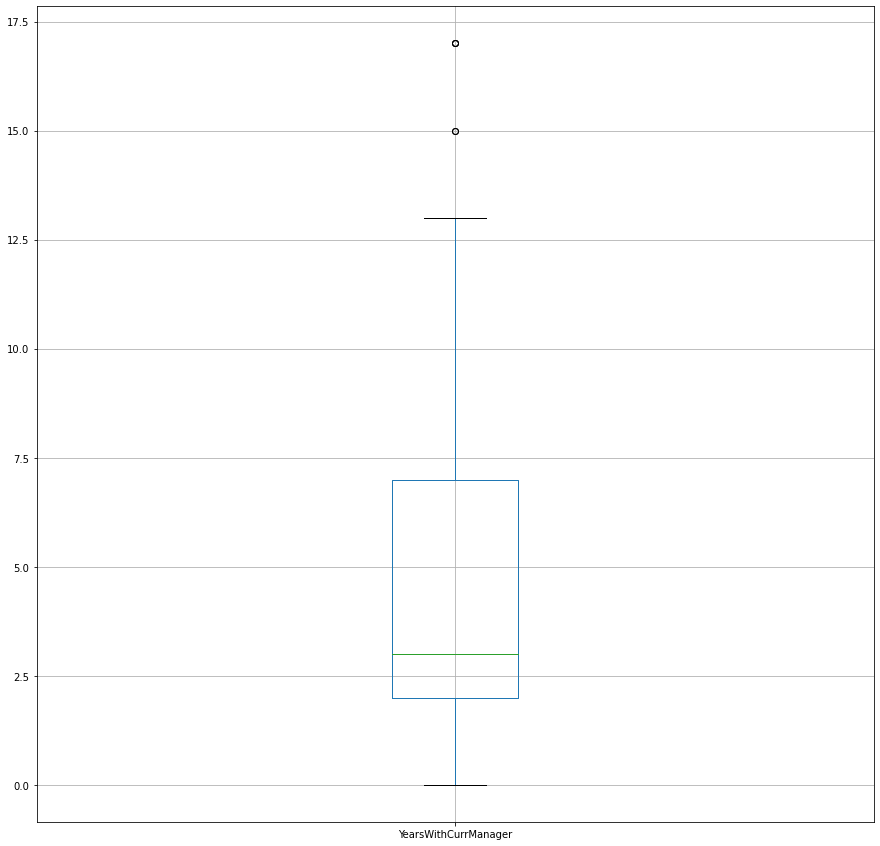

In [246]:
df_c[['YearsWithCurrManager']].boxplot(figsize= (15, 15))

In [247]:
df_c = df_c[(df_c['YearsWithCurrManager'] < 15)]
df_c

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Satisfaction
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,7
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,9
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,9
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8,7,3,0,10
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,6,3,3,2,2,2,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,1,17,3,3,5,2,0,3,10
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,1,9,5,3,7,7,1,7,6
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,1,6,0,3,6,2,0,3,6
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,4,0,17,3,2,9,6,0,8,10


- ''MonthlyIncome', 'YearsAtCompany' ,'YearsInCurrentRole' ,'YearsSinceLastPromotion', 'YearsWithCurrManager'의 이상치 제거

In [248]:
df_clean = df_c

In [249]:
df = df_c ;df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Satisfaction
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,7
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,9
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,9
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8,7,3,0,10
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,6,3,3,2,2,2,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,1,17,3,3,5,2,0,3,10
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,1,9,5,3,7,7,1,7,6
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,1,6,0,3,6,2,0,3,6
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,4,0,17,3,2,9,6,0,8,10


In [250]:
df.corr().round(4)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Satisfaction
Age,1.0000,0.0113,0.0110,0.2153,-0.0038,0.0385,0.0364,0.3852,0.0153,0.3687,...,0.0306,0.0605,0.6009,-0.0220,-0.0262,0.1797,0.1295,0.0951,0.1245,0.0244
DailyRate,0.0113,1.0000,-0.0032,-0.0267,0.0424,0.0230,0.0484,-0.0020,0.0419,0.0117,...,0.0100,0.0503,0.0317,0.0033,-0.0455,-0.0132,0.0150,-0.0446,-0.0183,0.0548
DistanceFromHome,0.0110,-0.0032,1.0000,-0.0010,-0.0287,0.0254,0.0035,0.0703,-0.0029,0.0448,...,0.0128,0.0557,0.0431,-0.0381,-0.0416,0.0252,0.0240,0.0084,0.0105,-0.0109
Education,0.2153,-0.0267,-0.0010,1.0000,-0.0295,0.0176,0.0362,0.1243,-0.0092,0.1261,...,-0.0078,0.0281,0.1549,-0.0212,0.0160,0.0658,0.0752,0.0669,0.0493,-0.0270
EnvironmentSatisfaction,-0.0038,0.0424,-0.0287,-0.0295,1.0000,-0.0364,-0.0136,-0.0151,-0.0158,-0.0376,...,0.0177,0.0103,-0.0312,-0.0165,0.0194,0.0162,0.0498,0.0278,0.0136,0.5801
HourlyRate,0.0385,0.0230,0.0254,0.0176,-0.0364,1.0000,0.0640,-0.0243,-0.0689,-0.0062,...,0.0136,0.0454,0.0034,-0.0128,-0.0101,-0.0243,-0.0309,-0.0470,-0.0178,-0.0535
JobInvolvement,0.0364,0.0484,0.0035,0.0362,-0.0136,0.0640,1.0000,-0.0017,-0.0017,-0.0091,...,0.0323,0.0314,-0.0027,-0.0166,-0.0007,0.0121,0.0222,0.0013,0.0452,0.0097
JobLevel,0.3852,-0.0020,0.0703,0.1243,-0.0151,-0.0243,-0.0017,1.0000,0.0179,0.9073,...,-0.0148,0.0388,0.6694,-0.0200,0.0352,0.4375,0.3538,0.2316,0.3340,-0.0068
JobSatisfaction,0.0153,0.0419,-0.0029,-0.0092,-0.0158,-0.0689,-0.0017,0.0179,1.0000,0.0150,...,-0.0151,0.0059,0.0053,-0.0040,-0.0244,0.0319,0.0288,0.0231,0.0031,0.5666
MonthlyIncome,0.3687,0.0117,0.0448,0.1261,-0.0376,-0.0062,-0.0091,0.9073,0.0150,1.0000,...,-0.0114,0.0270,0.6440,-0.0283,0.0237,0.3936,0.3180,0.2056,0.2912,-0.0196


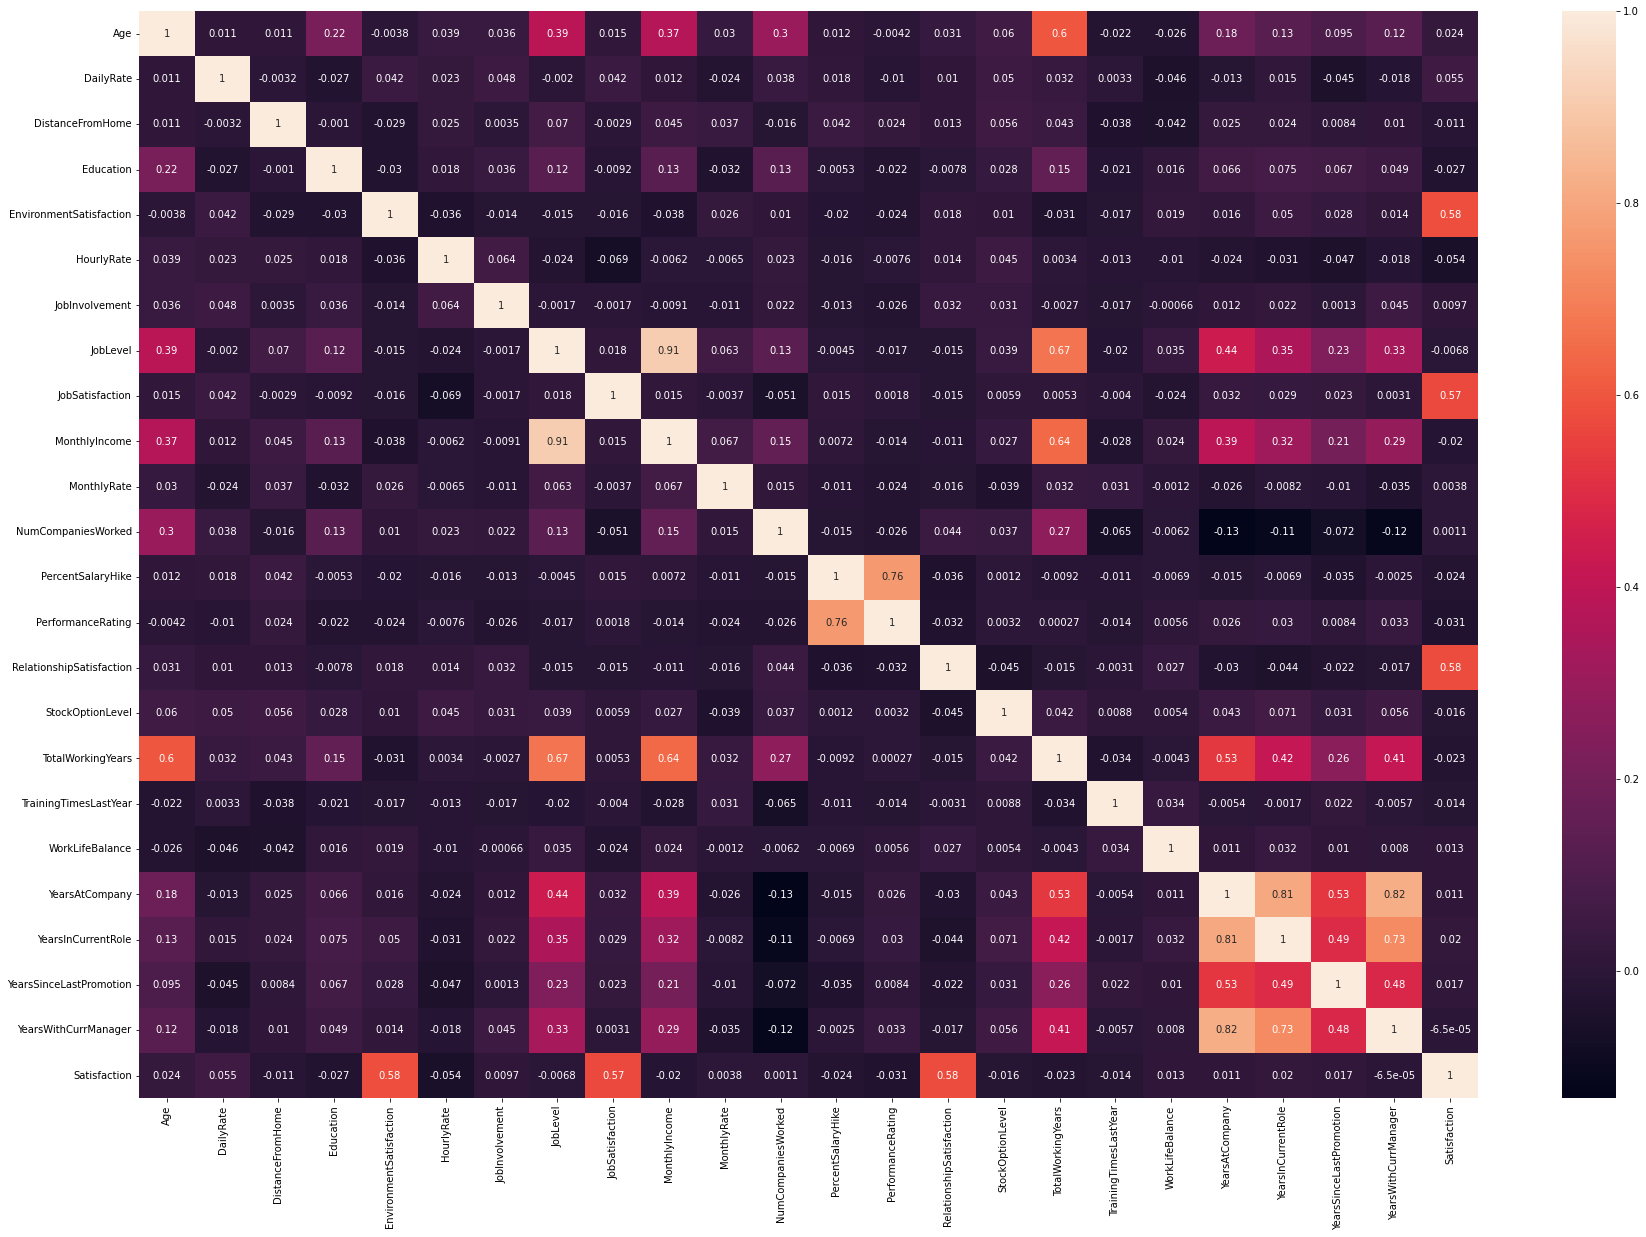

In [251]:
plt.figure(figsize = (30,20)) 
sns.heatmap(df.corr(),annot = True)
plt.show()

- corr이 0.5이상인 변수들간 scatterplot 그려봄

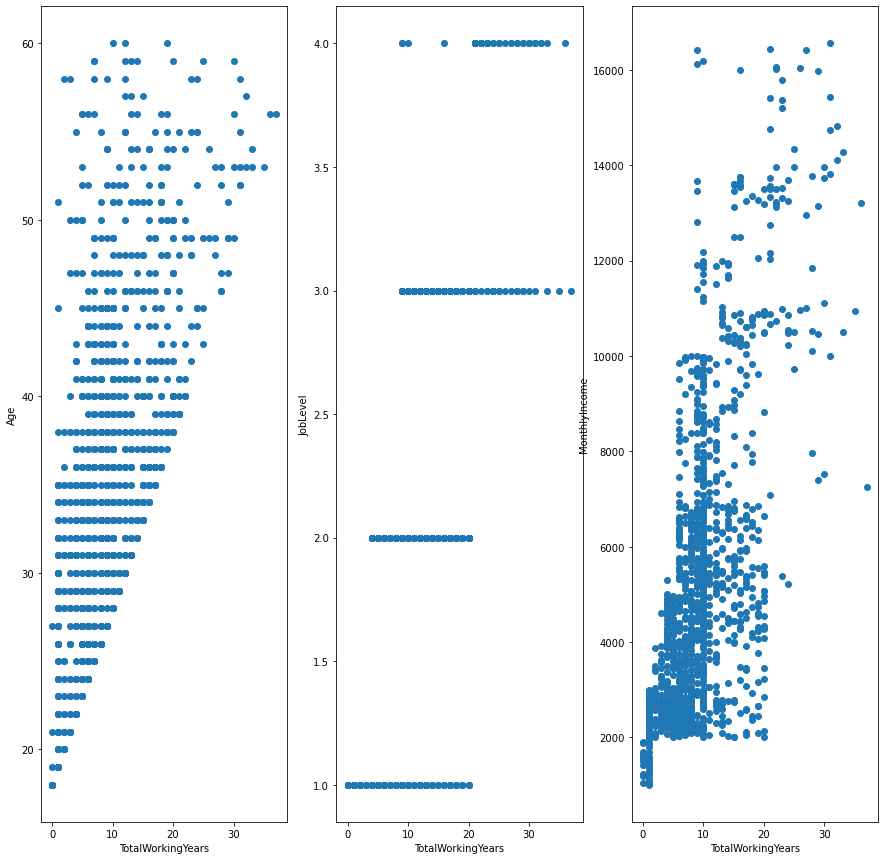

In [269]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))

for i, column in enumerate(['Age', 'JobLevel', 'MonthlyIncome']):
    axes[i].scatter(df['TotalWorkingYears'], df[column])
    axes[i].set_xlabel('TotalWorkingYears')
    axes[i].set_ylabel(column)
    
plt.show()

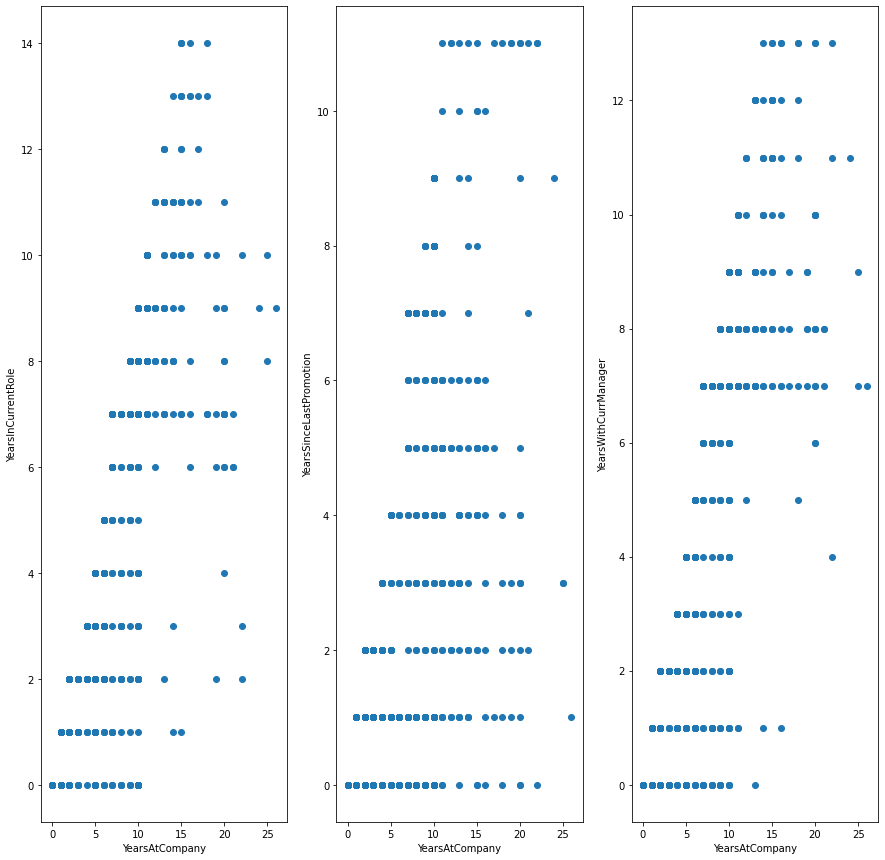

In [270]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))

for i, column in enumerate(['YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']):
    axes[i].scatter(df['YearsAtCompany'], df[column])
    axes[i].set_xlabel('YearsAtCompany')
    axes[i].set_ylabel(column)
    
plt.show()

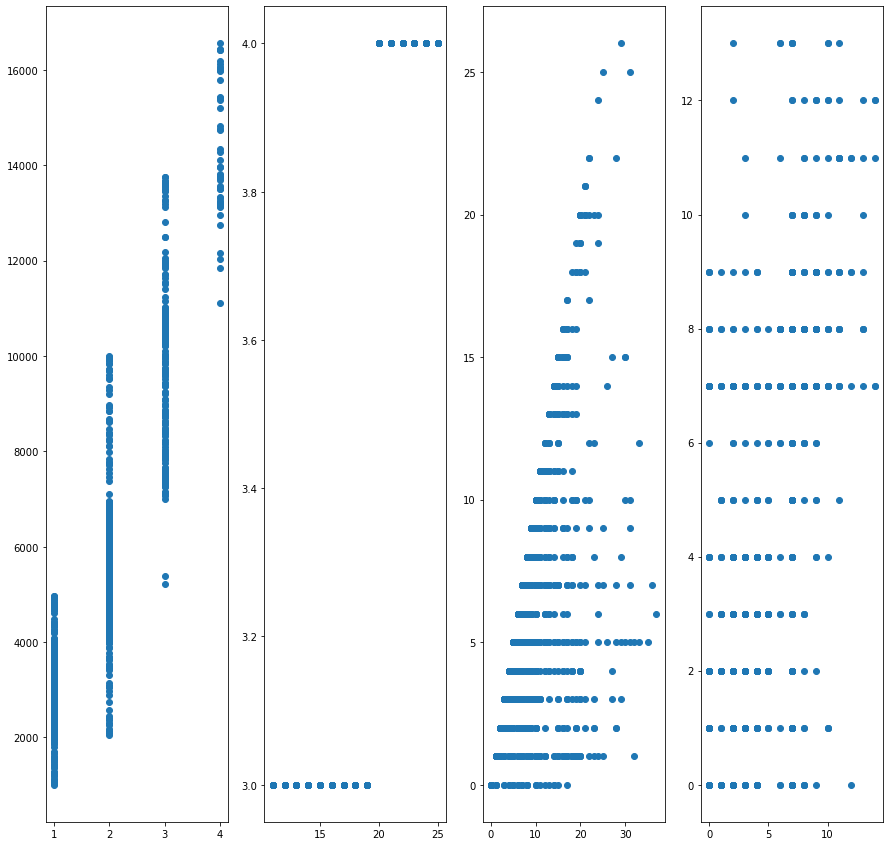

In [271]:
fig, axes=plt.subplots(1, 4, figsize = (15, 15))

axes[0].scatter(df['JobLevel'], df['MonthlyIncome'])
axes[1].scatter(df['PercentSalaryHike'], df['PerformanceRating'])
axes[2].scatter(df['TotalWorkingYears'], df['YearsAtCompany'])
axes[3].scatter(df['YearsInCurrentRole'], df['YearsWithCurrManager'])

plt.show()

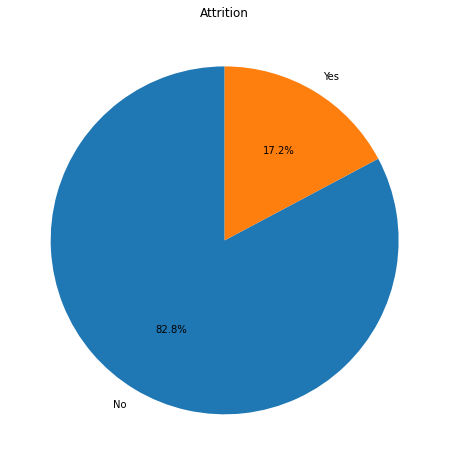

In [255]:
attrition_counts = df['Attrition'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(attrition_counts, labels = attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Attrition')
plt.show()

In [256]:
df.groupby('Age')['Attrition'].value_counts()

Age  Attrition
18   No           4
     Yes          4
19   Yes          6
     No           3
20   Yes          6
                 ..
57   No           4
58   No           5
     Yes          3
59   No           8
60   No           3
Name: Attrition, Length: 82, dtype: int64

In [257]:
df['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 39, 43, 50, 26, 46, 48, 55, 45, 56, 23, 51, 40, 54,
       20, 25, 19, 58, 57, 52, 47, 18, 60], dtype=int64)

In [258]:
df_obj = df.select_dtypes(include="object").columns.to_list(); df_obj

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [259]:
df[df_obj].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


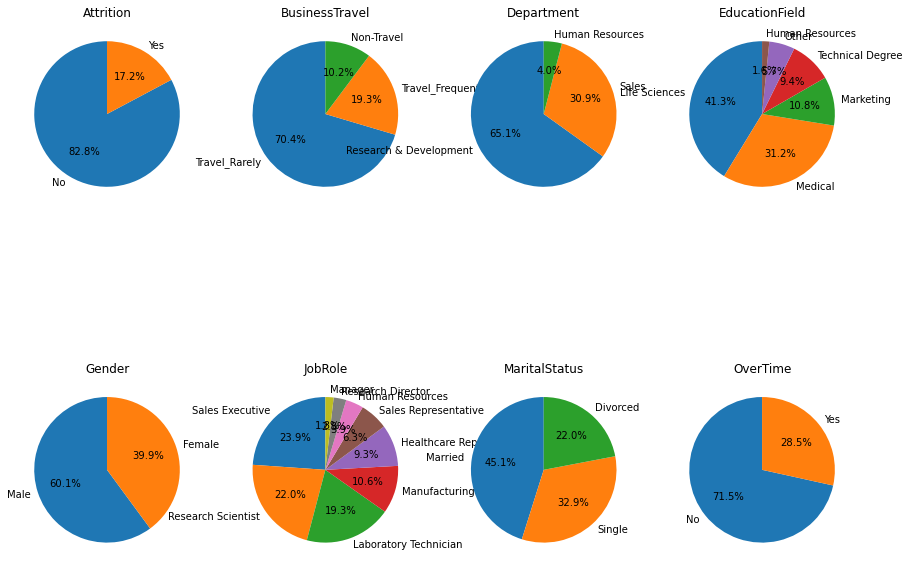

In [260]:
fig, axes = plt.subplots(2, 4, figsize=(15, 12))

for i, column in enumerate(df[df_obj]):
    row_idx = i//4
    col_idx= i%4
    
    counts = df[column].value_counts()
    axes[row_idx, col_idx].pie(counts, labels = counts.index, autopct='%1.1f%%', startangle=90)
    axes[row_idx, col_idx].set_title(column)
plt.show()

In [261]:
df['PerformanceRating'].value_counts()

3    1116
4     202
Name: PerformanceRating, dtype: int64

In [262]:
df[['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction']] # 만족도 변수들

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction
0,2,4,1
1,3,2,4
2,4,3,2
3,4,3,3
4,1,2,4
...,...,...,...
1465,3,4,3
1466,4,1,1
1467,2,2,2
1468,4,2,4


In [263]:
for i in df[['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction']]:
    print("-", i, "\n")
    print(df[i].value_counts())
    print("-"*50)

- EnvironmentSatisfaction 

3    408
4    394
2    261
1    255
Name: EnvironmentSatisfaction, dtype: int64
--------------------------------------------------
- JobSatisfaction 

4    419
3    394
1    253
2    252
Name: JobSatisfaction, dtype: int64
--------------------------------------------------
- RelationshipSatisfaction 

3    412
4    378
2    271
1    257
Name: RelationshipSatisfaction, dtype: int64
--------------------------------------------------


- 만족도 변수들을 모두 더해 파생변수 Satisfacion 만듦

In [264]:
df['Satisfaction'] = df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['RelationshipSatisfaction']

C:\Users\MJHwang\AppData\Local\Temp\ipykernel_25960\2767734083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Satisfaction'] = df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['RelationshipSatisfaction']


In [265]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Satisfaction
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,7
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,9
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,9
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8,7,3,0,10
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,6,3,3,2,2,2,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,1,17,3,3,5,2,0,3,10
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,1,9,5,3,7,7,1,7,6
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,1,6,0,3,6,2,0,3,6
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,4,0,17,3,2,9,6,0,8,10


In [266]:
df['Satisfaction'].value_counts()

8     263
9     241
7     216
10    190
6     157
11    111
5      74
12     34
4      17
3      15
Name: Satisfaction, dtype: int64

In [267]:
df.groupby('Attrition')['Satisfaction'].value_counts()

Attrition  Satisfaction
No         8               224
           9               210
           7               173
           10              167
           6               124
           11               93
           5                52
           12               33
           3                 8
           4                 7
Yes        7                43
           8                39
           6                33
           9                31
           10               23
           5                22
           11               18
           4                10
           3                 7
           12                1
Name: Satisfaction, dtype: int64